# Nigerian Food Price Prediction - Notebook 1 (Lagos Only)

## Objective
This notebook will:
1. Load the raw Nigerian food price dataset.
2. Focus on **Lagos state only**.
3. Explore the dataset and understand its columns.
4. Keep only relevant columns for modeling (closing prices and overall food price index).
5. Filter years **2020–2025**.
6. Aggregate multiple markets in Lagos into a **single state-level price per commodity per day**.
7. Handle missing values.
8. Export a clean CSV dataset ready for modeling.



## 2. Import libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("Libraries imported successfully!")

Libraries imported successfully!


## 3. Load Data

In [38]:
# Load the dataset
df = pd.read_csv('../data_raw/NGA_market_2007 to 2025.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nDate range: {df['price_date'].min()} to {df['price_date'].max()}")
df.head()

Dataset shape: (12597, 95)

Date range: 2007-01-01 to 2025-05-01


,ISO3,country,adm1_name,adm2_name,mkt_name,lat,lon,geo_id,price_date,year,month,currency,components,start_dense_data,last_survey_point,data_coverage,data_coverage_recent,index_confidence_score,spatially_interpolated,bread,cassava_meal,cowpeas,gari,groundnuts,maize,millet,rice,sorghum,yam,o_bread,h_bread,l_bread,c_bread,inflation_bread,trust_bread,o_cassava_meal,h_cassava_meal,l_cassava_meal,c_cassava_meal,inflation_cassava_meal,trust_cassava_meal,o_cowpeas,h_cowpeas,l_cowpeas,c_cowpeas,inflation_cowpeas,trust_cowpeas,o_gari,h_gari,l_gari,c_gari,inflation_gari,trust_gari,o_groundnuts,h_groundnuts,l_groundnuts,c_groundnuts,inflation_groundnuts,trust_groundnuts,o_maize,h_maize,l_maize,c_maize,inflation_maize,trust_maize,o_millet,h_millet,l_millet,c_millet,inflation_millet,trust_millet,o_rice,h_rice,l_rice,c_rice,inflation_rice,trust_rice,o_sorghum,h_sorghum,l_sorghum,c_sorghum,inflation_sorghum,trust_sorghum,o_yam,h_yam,l_yam,c_yam,inflation_yam,trust_yam,o_food_price_index,h_food_price_index,l_food_price_index,c_food_price_index,inflation_food_price_index,trust_food_price_index
0,NGA,Nigeria,Abia,Oboma Ngwa,Aba,5.15,7.36,gid_5150000073600000,2007-01-01,2007,1,NGN,"bread (1 Unit, Index Weight = 1), cassava_meal...",Jan 2007,Jan 2023,12.01,0,0.96,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.09,39.31,36.86,38.09,NaN,7.2,10147.74,10302.97,9829.78,10165.96,NaN,9.2,10576.87,11018.41,10080.64,10574.63,NaN,6.6,7873.09,8059.34,7656.14,7912.79,NaN,9.3,25225.53,25539.31,24390.68,25152.93,NaN,8.8,3353.65,3404.27,3216.58,3363.81,NaN,9.3,4560.92,4666.26,4421.32,4587.98,NaN,8.9,6164.99,6235.31,6031.07,6209.82,NaN,9.5,4233.74,4356.45,4095.72,4266.28,NaN,8.3,61.01,64.19,59.13,61.74,NaN,9.2,0.47,0.48,0.46,0.48,NaN,9.4
1,NGA,Nigeria,Abia,Oboma Ngwa,Aba,5.15,7.36,gid_5150000073600000,2007-02-01,2007,2,NGN,"bread (1 Unit, Index Weight = 1), cassava_meal...",Jan 2007,Jan 2023,12.01,0,0.96,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.08,39.31,36.86,38.39,NaN,7.2,10084.45,10321.47,9627.00,9627.00,NaN,9.2,10547.29,11016.07,9214.69,9214.69,NaN,6.6,7897.36,8099.98,7562.43,7562.43,NaN,9.3,24893.14,25465.80,23673.78,23673.78,NaN,8.8,3320.46,3414.59,3037.84,3037.84,NaN,9.3,4570.74,4693.94,4182.67,4182.67,NaN,8.9,6177.79,6280.65,5918.40,5918.40,NaN,9.5,4258.57,4389.94,3748.06,3748.06,NaN,8.3,62.40,64.96,59.25,59.25,NaN,9.2,0.47,0.48,0.45,0.45,NaN,9.4
2,NGA,Nigeria,Abia,Oboma Ngwa,Aba,5.15,7.36,gid_5150000073600000,2007-03-01,2007,3,NGN,"bread (1 Unit, Index Weight = 1), cassava_meal...",Jan 2007,Jan 2023,12.01,0,0.96,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.49,39.63,37.35,37.90,NaN,7.2,9441.19,9704.99,9185.07,9704.99,NaN,9.2,8759.96,9214.80,8317.34,9214.80,NaN,6.6,7458.60,7652.24,7264.96,7614.74,NaN,9.3,23141.30,23840.14,22442.47,23805.37,NaN,8.8,2946.76,3043.77,2849.76,3041.09,NaN,9.3,4072.13,4191.93,3959.82,4191.93,NaN,8.9,5796.59,5929.94,5663.24,5923.32,NaN,9.5,3653.49,3788.04,3518.95,3752.11,NaN,8.3,59.06,61.52,56.61,59.43,NaN,9.2,0.44,0.45,0.43,0.45,NaN,9.4
3,NGA,Nigeria,Abia,Oboma Ngwa,Aba,5.15,7.36,gid_5150000073600000,2007-04-01,2007,4,NGN,"bread (1 Unit, Index Weight = 1), cassava_meal...",Jan 2007,Jan 2023,12.01,0,0.96,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.75,38.79,36.71,38.31,NaN,7.2,9690.08,9938.50,9441.67,9711.28,NaN,9.2,9000.20,9423.97,8576.42,9148.48,NaN,6.6,7617.10,7822.72,7411.47,7624.58,NaN,9.3,23684.74,24281.06,23088.42,23635.41,NaN,8.8,3012.11,3107.03,2917.19,3018.89,NaN,9.3,4140.71,4299.48,3981.94,4154.57,NaN,8.9,5843.83,5963.77,5723.89,5894.22,NaN,9.5,3667.32,3813.36,3521.28,3727.59,NaN,8.3,60.13,61.91,58.35,59.05,NaN,9.2,0.45,0.46,0.44,0.45,NaN,9.4
4,NGA,Nigeria,Abia,Oboma Ngwa,Aba,5.15,7.36,gid_5150000073600000,2007-05-01,2007,5,NGN,"bread (1 Unit, Index Weight = 1), cassava_meal...",Jan 2007,Jan 2023,12.01,0,0.96,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.48,39.46,37.50,37.82,NaN,7.2,9746.52,9950.41,9542.62,9611.01,NaN,9.2,9085.91,9508.10,8663.71,9104.57,NaN,6.6,7661.86,7833.59,7490.13,7549.90,NaN,9.3,23584.98,24067.33,23

## 4. Initial Data Exploration

In [43]:
# Column names and data types
df.info()

#convert date(price_date) to date type
df['price_date'] = pd.to_datetime(df['price_date'], errors='coerce')
df = df.dropna(subset=['price_date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12597 entries, 0 to 12596
Data columns (total 95 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ISO3                        12597 non-null  object        
 1   country                     12597 non-null  object        
 2   adm1_name                   12597 non-null  object        
 3   adm2_name                   12597 non-null  object        
 4   mkt_name                    12597 non-null  object        
 5   lat                         12376 non-null  float64       
 6   lon                         12376 non-null  float64       
 7   geo_id                      12597 non-null  object        
 8   price_date                  12597 non-null  datetime64[ns]
 9   year                        12597 non-null  int64         
 10  month                       12597 non-null  int64         
 11  currency                    12597 non-null  object    

In [44]:
# Summary statistics for numerical columns
df.describe()

,lat,lon,price_date,year,month,data_coverage,data_coverage_recent,index_confidence_score,spatially_interpolated,bread,cassava_meal,cowpeas,gari,groundnuts,maize,millet,rice,sorghum,yam,o_bread,h_bread,l_bread,c_bread,inflation_bread,trust_bread,o_cassava_meal,h_cassava_meal,l_cassava_meal,c_cassava_meal,inflation_cassava_meal,trust_cassava_meal,o_cowpeas,h_cowpeas,l_cowpeas,c_cowpeas,inflation_cowpeas,trust_cowpeas,o_gari,h_gari,l_gari,c_gari,inflation_gari,trust_gari,o_groundnuts,h_groundnuts,l_groundnuts,c_groundnuts,inflation_groundnuts,trust_groundnuts,o_maize,h_maize,l_maize,c_maize,inflation_maize,trust_maize,o_millet,h_millet,l_millet,c_millet,inflation_millet,trust_millet,o_rice,h_rice,l_rice,c_rice,inflation_rice,trust_rice,o_sorghum,h_sorghum,l_sorghum,c_sorghum,inflation_sorghum,trust_sorghum,o_yam,h_yam,l_yam,c_yam,inflation_yam,trust_yam,o_food_price_index,h_food_price_index,l_food_price_index,c_food_price_index,inflation_food_price_index,trust_food_price_index
count,12376.000000,12376.000000,12597,12597.000000,12597.000000,1.259700e+04,12597.0,1.259700e+04,12597.0,1544.000000,1231.000000,1487.000000,1428.000000,1446.000000,1692.000000,1591.000000,1427.000000,1669.000000,1187.000000,12597.000000,12597.000000,12597.000000,12597.000000,11913.000000,12597.000000,12597.000000,12597.000000,12597.000000,12597.000000,11913.000000,12597.000000,12597.000000,12597.000000,12597.000000,12597.000000,11913.000000,12597.000000,12597.000000,12597.000000,12597.000000,12597.000000,11913.000000,12597.000000,12597.000000,12597.000000,12597.000000,12597.000000,11913.000000,12597.000000,12597.000000,12597.000000,12597.000000,12597.000000,11913.000000,12597.000000,12597.000000,12597.000000,12597.000000,12597.00000,11913.000000,12597.000000,12597.000000,12597.000000,12597.000000,12597.000000,11913.000000,12597.000000,12597.000000,12597.000000,12597.000000,12597.000000,11913.000000,12597.000000,12597.000000,12597.000000,12597.000000,12597.000000,11913.000000,12597.000000,12597.000000,12597.000000,12597.000000,12597.000000,11913.000000,12597.000000
mean,11.505714,11.564286,2016-03-01 13:14:55.927601664,2015.714932,6.420814,1.201000e+01,0.0,9.600000e-01,0.0,261.046813,18746.527774,26093.394210,15887.914671,32816.223672,12214.501531,14456.949485,18712.062957,13537.006477,279.710017,140.571153,148.525824,132.825860,140.337157,24.122177,7.631984,17233.399268,17740.453702,16750.671326,17257.189350,10.474010,9.323529,18414.243016,19320.784403,17495.561244,18401.093754,7.113820,7.123974,15459.443635,15949.904354,14995.631303,15478.054562,12.027110,9.410542,36361.479455,37498.759301,35245.212728,36419.592546,6.648528,8.985886,10622.899632,11008.176826,10247.044923,10620.877704,13.852808,9.403826,12036.581992,12443.796041,11639.292312,12031.79566,14.188323,9.068929,18352.733691,18826.760429,17955.202059,18423.718622,15.458937,9.568651,10739.012204,11139.941679,10349.131838,10736.312786,14.938641,8.566762,187.245115,194.175955,180.611633,187.264897,13.942408,9.311431,1.024206,1.047745,1.001592,1.024619,10.392064,9.480416
min,5.150000,3.400000,2007-01-01 00:00:00,2007.000000,1.000000,1.201000e+01,0.0,9.600000e-01,0.0,96.530000,4400.000000,7472.000000,4000.000000,7646.000000,2350.000000,2235.000000,6600.000000,2295.000000,22.000000,9.100000,9.970000,8.630000,9.350000,-75.650000,7.200000,4192.290000,4523.380000,3861.210000,4400.000000,-65.840000,9.200000,5901.000000,6400.360000,5401.650000,5966.080000,-62.420000,6.600000,3825.400000,4062.350000,3588.440000,4000.000000,-68.760000,9.300000,8114.420000,8781.530000,7447.300000,8199.500000,-73.950000,8.800000,2329.210000,2502.950000,2109.850000,2350.000000,-46.300000,9.300000,2284.360000,2433.270000,2133.540000,2235.69000,-50.960000,8.900000,5198.250000,5351.410000,5008.110000,5174.950000,-31.290000,9.500000,2331.070000,2496.980000,2145.890000,2295.000000,-55.520000,8.300000,47.350000,48.930000,41.890000,47.270000,-84.860000,9.200000,0.360000,0.380000,0.350000,0.360000,-38.760000,9.400000
25%,11.267500,11.0

In [45]:
# Commodities in dataset
commodities = ['bread', 'cassava_meal', 'cowpeas', 'gari', 'groundnuts', 
               'maize', 'millet', 'rice', 'sorghum', 'yam']

In [46]:
# Check unique states
print("Number of states:", df['adm1_name'].nunique())
print(df['adm1_name'].value_counts())

Number of states: 14
adm1_name
Borno             5967
Yobe              3315
Adamawa            663
Kaduna             442
Katsina            221
Abia               221
Kano               221
Gombe              221
Kebbi              221
Jigawa             221
Oyo                221
Zamfara            221
Lagos              221
Market Average     221
Name: count, dtype: int64


In [47]:
# View price distribution for a sample food(eg. rice)
df['c_rice'].describe()

count    12597.000000
mean     18423.718622
std      14124.449749
min       5174.950000
25%       9132.790000
50%      11474.040000
75%      23257.780000
max      72548.560000
Name: c_rice, dtype: float64

## 5. Filter to Lagos and 2020-2025 Timeframe

In [60]:
# Keep only Lagos
df_lagos = df[df['adm1_name'] == 'Lagos']

# Filter years 2020–2025
df_lagos = df_lagos[(df_lagos['price_date'].dt.year >= 2020) & (df_lagos['price_date'].dt.year <= 2025)]
print("Filtered Lagos shape:", df_lagos.shape)

df_lagos.head()

df_lagos['adm2_name'].unique()


Filtered Lagos shape: (65, 95)


array(['Kosofe'], dtype=object)

## 6. Columns to keep
- Keep: adm1_name, price_date, closing prices (c_*), c_food_price_index
- Drop: metadata, opening/high/low prices, inflation, trust, ADM2, markets, coordinates as they are not needed for our current prediction.

In [57]:
# Closing price columns
closing_cols = [
    'c_bread', 'c_cassava_meal', 'c_cowpeas', 'c_gari', 
    'c_groundnuts', 'c_maize', 'c_millet', 'c_rice', 
    'c_sorghum', 'c_yam', 'c_food_price_index'
]

cols_to_keep = ['adm1_name', 'price_date'] + closing_cols
df_lagos = df_lagos[cols_to_keep]

df_lagos.head()


,adm1_name,price_date,c_bread,c_cassava_meal,c_cowpeas,c_gari,c_groundnuts,c_maize,c_millet,c_rice,c_sorghum,c_yam,c_food_price_index
8112,Lagos,2020-01-01,609.76,8700.00,16450.00,5034.31,26650.00,10663.99,12800.00,22475.00,11577.97,189.79,1.17
8113,Lagos,2020-02-01,609.76,8700.00,16300.00,5756.61,26900.00,10650.00,13225.00,22300.00,11475.00,196.25,1.18
8114,Lagos,2020-03-01,609.76,9964.15,17287.50,7028.40,28475.00,11912.50,14012.50,26525.00,13225.00,211.38,1.28
8115,Lagos,2020-04-01,664.74,11763.00,18466.67,9691.85,31786.67,13210.00,15153.33,28348.97,14136.67,234.98,1.41
8116,Lagos,2020-05-01,605.79,13769.13,18750.00,12397.37,33722.58,14022.58,17290.32,28093.55,14674.19,282.73,1.45


## 7. Aggregate Multiple Markets (State-Level)

In [61]:
# Aggregate markets per date by averaging closing prices
df_lagos_state = df_lagos.groupby(['adm1_name', 'price_date'])[closing_cols].mean().reset_index()

# Handle missing values: forward-fill then backward-fill
df_lagos_state = df_lagos_state.groupby('adm1_name').ffill().bfill()

# Check final shape
print(df_lagos_state.shape)
df_lagos_state.head()


(65, 12)


,price_date,c_bread,c_cassava_meal,c_cowpeas,c_gari,c_groundnuts,c_maize,c_millet,c_rice,c_sorghum,c_yam,c_food_price_index
0,2020-01-01,609.76,8700.00,16450.00,5034.31,26650.00,10663.99,12800.00,22475.00,11577.97,189.79,1.17
1,2020-02-01,609.76,8700.00,16300.00,5756.61,26900.00,10650.00,13225.00,22300.00,11475.00,196.25,1.18
2,2020-03-01,609.76,9964.15,17287.50,7028.40,28475.00,11912.50,14012.50,26525.00,13225.00,211.38,1.28
3,2020-04-01,664.74,11763.00,18466.67,9691.85,31786.67,13210.00,15153.33,28348.97,14136.67,234.98,1.41
4,2020-05-01,605.79,13769.13,18750.00,12397.37,33722.58,14022.58,17290.32,28093.55,14674.19,282.73,1.45


## Step 8: Create per-kg columns for each commodity

- component column shows: bread (1 Unit, Index Weight = 1), cassava_meal (100 KG, Index Weight = 0.01), cowpeas (100 KG, Index Weight = 0.01),
gari (100 KG, Index Weight = 0.01), groundnuts (100 KG, Index Weight = 0.01), maize (100 KG, Index Weight = 0.01), millet (100 KG, Index Weight = 0.01),
rice (50 KG, Index Weight = 0.02), sorghum (100 KG, Index Weight = 0.01), yam (1 KG, Index Weight = 1).

- Some commodities are measured per 100 kg (cassava, maize, cowpeas, etc.) or per 50 kg (rice), while bread is per unit.
- ML models work better when numeric features are comparable in scale.
- By converting to 'price per kg' for most foods, we help the model see actual trends per kg.
- Bread remains per unit; later we can normalize all features if needed.


In [67]:
# Define divisor for per-kg conversion
per_kg_divisor = {
    'c_bread': 1,                # leave as is for now(per unit)
    'c_cassava_meal': 100,
    'c_cowpeas': 100,
    'c_gari': 100,
    'c_groundnuts': 100,
    'c_maize': 100,
    'c_millet': 100,
    'c_rice': 50,
    'c_sorghum': 100,
    'c_yam': 1                   
}

# Create new per-kg columns
for col, divisor in per_kg_divisor.items():
    new_col = col + '_per_kg'
    df_lagos_state[new_col] = df_lagos_state[col] / divisor

df_lagos_state.head()


,price_date,c_bread,c_cassava_meal,c_cowpeas,c_gari,c_groundnuts,c_maize,c_millet,c_rice,c_sorghum,c_yam,c_food_price_index,c_bread_per_kg,c_cassava_meal_per_kg,c_cowpeas_per_kg,c_gari_per_kg,c_groundnuts_per_kg,c_maize_per_kg,c_millet_per_kg,c_rice_per_kg,c_sorghum_per_kg,c_yam_per_kg
0,2020-01-01,609.76,8700.00,16450.00,5034.31,26650.00,10663.99,12800.00,22475.00,11577.97,189.79,1.17,609.76,87.0000,164.5000,50.3431,266.5000,106.6399,128.0000,449.5000,115.7797,189.79
1,2020-02-01,609.76,8700.00,16300.00,5756.61,26900.00,10650.00,13225.00,22300.00,11475.00,196.25,1.18,609.76,87.0000,163.0000,57.5661,269.0000,106.5000,132.2500,446.0000,114.7500,196.25
2,2020-03-01,609.76,9964.15,17287.50,7028.40,28475.00,11912.50,14012.50,26525.00,13225.00,211.38,1.28,609.76,99.6415,172.8750,70.2840,284.7500,119.1250,140.1250,530.5000,132.2500,211.38
3,2020-04-01,664.74,11763.00,18466.67,9691.85,31786.67,13210.00,15153.33,28348.97,14136.67,234.98,1.41,664.74,117.6300,184.6667,96.9185,317.8667,132.1000,151.5333,566.9794,141.3667,234.98
4,2020-05-01,605.79,13769.13,18750.00,12397.37,33722.58,14022.58,17290.32,28093.55,14674.19,282.73,1.45,605.79,137.6913,187.5000,123.9737,337.2258,140.2258,172.9032,561.8710,146.7419,282.73


## 9. Plot Trends for all Commodities

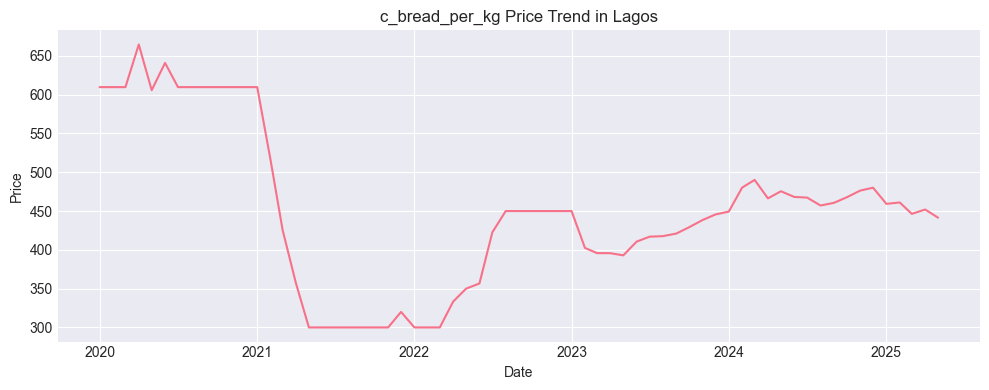

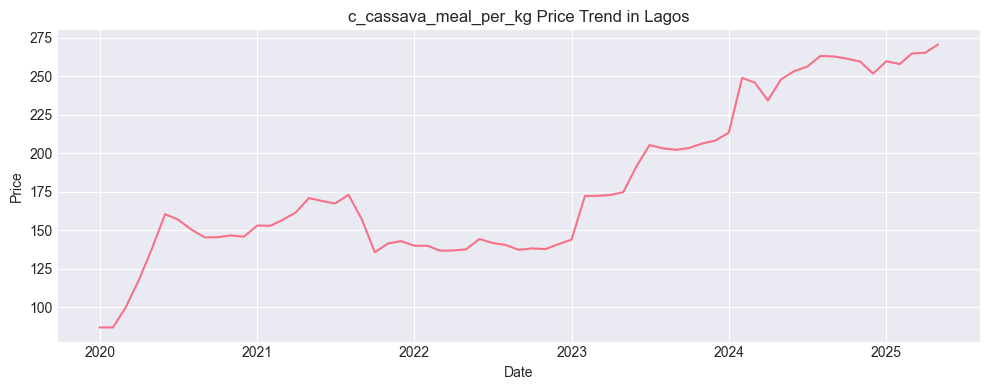

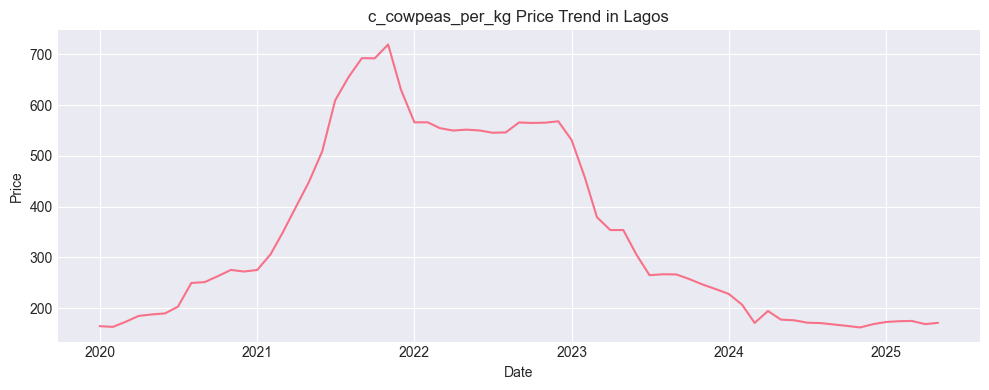

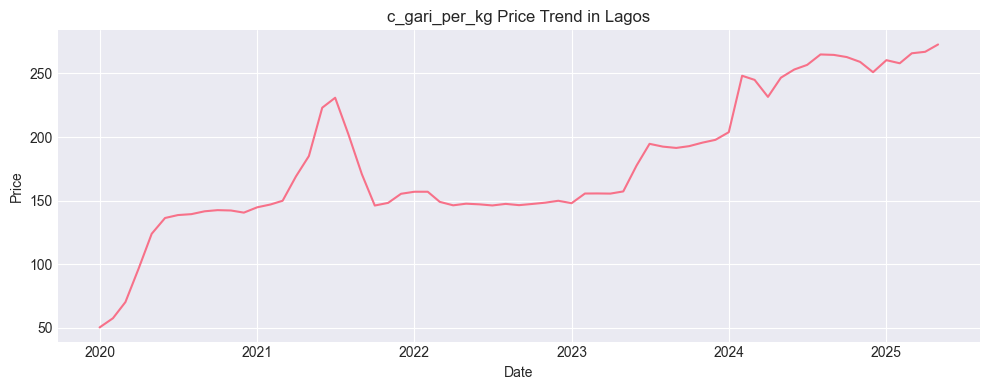

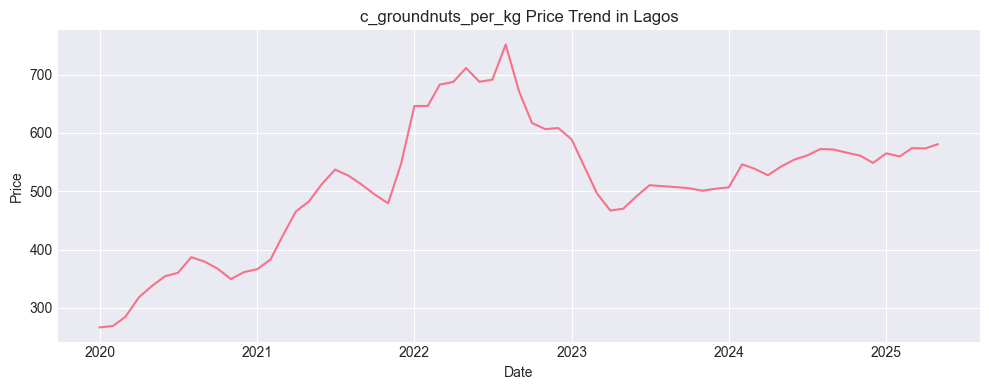

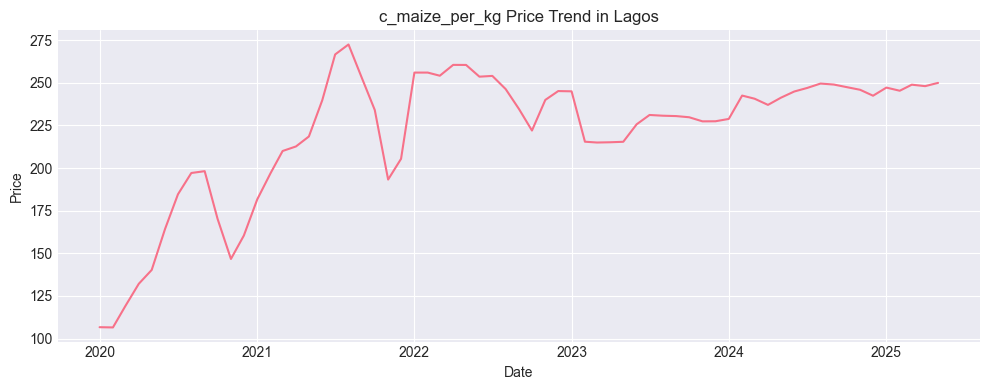

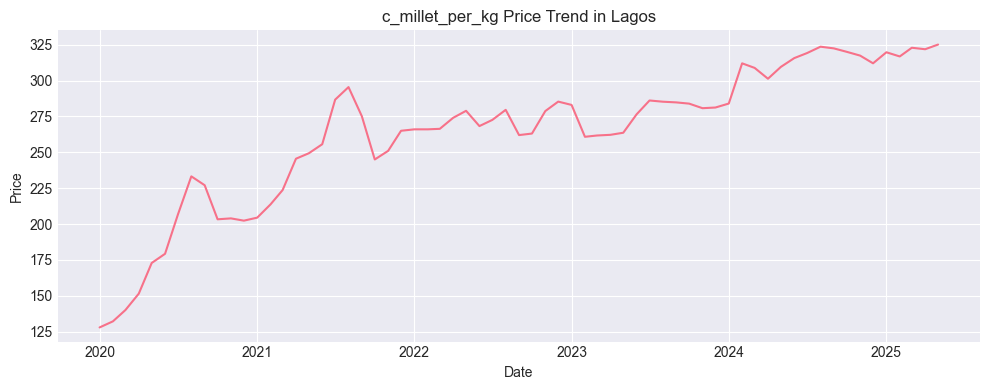

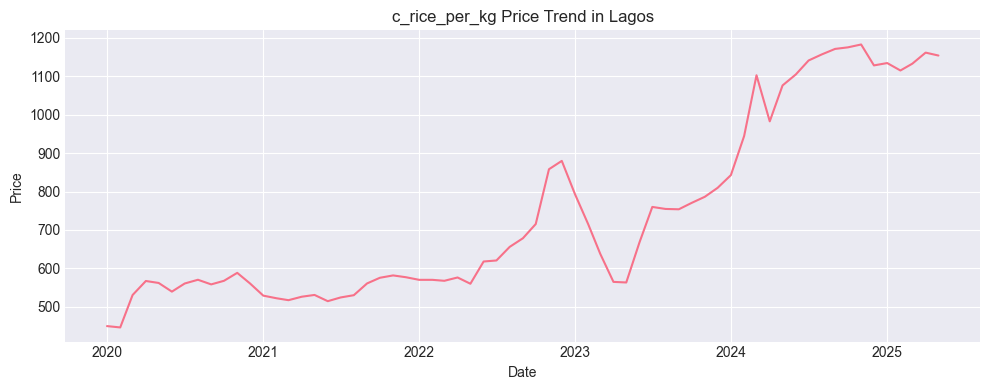

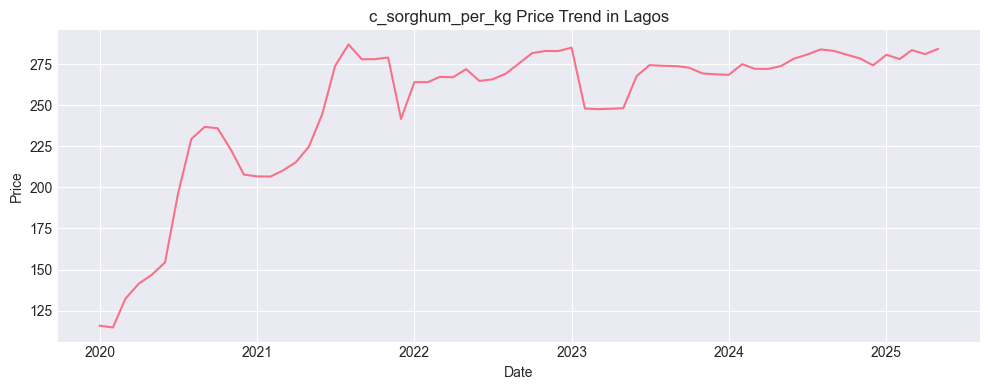

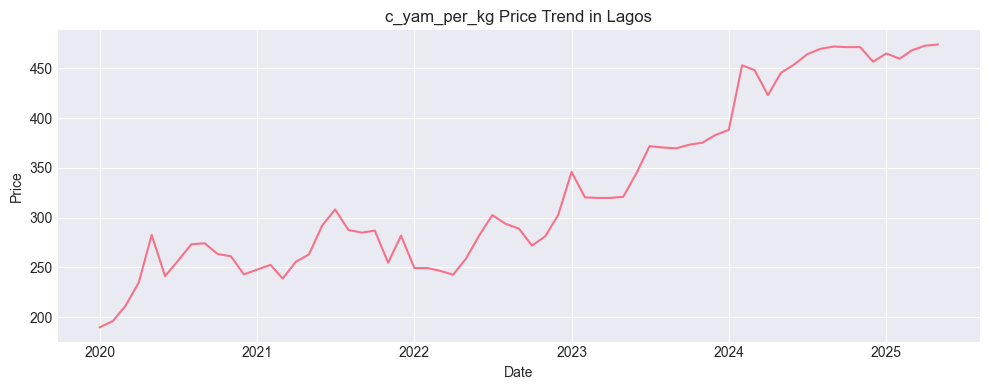

In [70]:
# Identify all commodity columns (those starting with "c_")
commodity_cols = [col for col in df_lagos.columns if col.endswith("_kg")]

# Loop through commodities and plot each one
for col in commodity_cols:
    plt.figure(figsize=(10, 4))
    plt.plot(df_lagos['price_date'], df_lagos[col])
    plt.title(f"{col} Price Trend in Lagos")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.tight_layout()
    plt.show()


## 10. Save Filtered Dataset

In [ ]:
# Save the filtered data
output_path = '../data_processed/nga_food_prices_2020_2025.csv'
df_filtered.to_csv(output_path, index=False)

print(f"✓ Filtered dataset saved to: {output_path}")
print(f"  Shape: {df_filtered.shape}")
print(f"  Size: {df_filtered.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

## 7. Summary

**Next Steps**:
- Data cleaning (handle missing values)
- Feature engineering (time-based features, market features)
- Exploratory data analysis (EDA)
- Model development